In [2]:
import pandas as pd

import glob

In [21]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [1]:
%config Completer.use_jedi = False

## Load the data
Download the data from here https://vaers.hhs.gov/data/datasets.html
And extract to Data Folder.


The data contains 3 kinds of CSV files:
- `YYYY`VAERSDATA Eg. 1990VAERSDATA.csv
- `YYYY`VAERSSYMPTOMS Eg. 1990VAERSSYMPTOMS.csv
- `YYYY`VAERSVAX Eg. 1990VAERSVAX.csv


In [3]:
data_df = pd.concat([pd.read_csv(f) for f in glob.glob('../Data/AllVAERSDataCSVS/202*VAERSDATA.csv')], 
                    join='outer').set_index('VAERS_ID')

data_df.shape

/home/xion/.conda/envs/torchenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/xion/.conda/envs/torchenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(486862, 34)

In [41]:
data_df.sample(5)

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
1195792,04/12/2021,FL,41.0,41.0,NaN,M,NaN,"Systemic: Dizziness / Lightheadness-Mild, Syst...",NaN,NaN,...,NaN,NaN,NaN,NaN,2,04/12/2021,NaN,NaN,NaN,NaN
1147948,03/30/2021,KY,86.0,86.0,NaN,F,NaN,Received Vaccine 1/20/21 1/21/2021 Morning: Nu...,Y,01/21/2021,...,Recent history of Fall - 1/17/2021 and 12/28/2...,NaN,NaN,NaN,2,03/30/2021,NaN,NaN,NaN,NaN
959479,01/20/2021,SC,38.0,38.0,NaN,F,NaN,"general fatigue (sleepiness), muscle aches, he...",NaN,NaN,...,none - except adverse event symptoms from Pfiz...,none,Pfizer Dose 1 Dec 2020,vsafe,2,01/20/2021,NaN,NaN,NaN,Rashes - Levaquin
1359251,05/28/2021,WA,54.0,54.0,NaN,M,NaN,Acute pericarditis.,NaN,NaN,...,None,None,NaN,NaN,2,05/28/2021,NaN,NaN,NaN,None
1226219,04/18/2021,CO,64.0,64.0,NaN,F,NaN,A rather large bruise/clot developed on the th...,NaN,NaN,...,None,"Stroke, Brest Cancer, Epilepsy",NaN,NaN,2,04/18/2021,NaN,Y,Y,None


In [4]:
data_df.columns

Index(['RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

In [5]:
symptoms_df = pd.concat([pd.read_csv(f) for f in glob.glob('../Data/AllVAERSDataCSVS/202*VAERSSYMPTOMS.csv')], 
                        join='outer').set_index('VAERS_ID')

In [6]:
symptoms_df.shape

(648024, 10)

In [7]:
vax_df =  pd.concat([pd.read_csv(f) for f in glob.glob('../Data/AllVAERSDataCSVS/202*VAERSVAX.csv')], 
                        join='outer').set_index('VAERS_ID')

In [26]:
vax_df.columns

Index(['VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [8]:
vax_df.VAX_TYPE.unique()

array(['VARZOS', 'UNK', 'FLU3', 'FLUR4', 'FLU4', 'PPV', 'PNC13',
       'DTAPIPV', 'HEP', 'FLUC4', 'HEPA', 'HPV9', 'FLUX', 'MNQ', 'DTAP',
       'MMR', 'MMRV', 'MENB', 'VARCEL', 'RV1', 'RV5', 'TDAP', 'FLUN4',
       'FLUA3', 'MEN', 'IPV', 'DTAPHEPBIP', 'HEPAB', 'DTAPIPVHIB', 'HPV4',
       'HIBV', 'TYP', 'DTP', 'RAB', 'TD', 'PNC10', 'FLUN3', 'ANTH', 'YF',
       'JEV1', 'ADEN_4_7', 'SMALL', 'HPVX', 'PNC', 'DT', 'TTOX', 'CHOL',
       'FLUR3', 'RVX', 'HPV2', 'BCG', 'JEVX', 'DTOX', 'HBHEPB', 'FLUA4',
       'RUB', 'FLUC3', 'MENHIB', 'COVID19', 'DF', 'FLUX(H1N1)', 'EBZR',
       'OPV', 'FLU(H1N1)', 'MNQHIB'], dtype=object)

<AxesSubplot:xlabel='VAX_TYPE'>

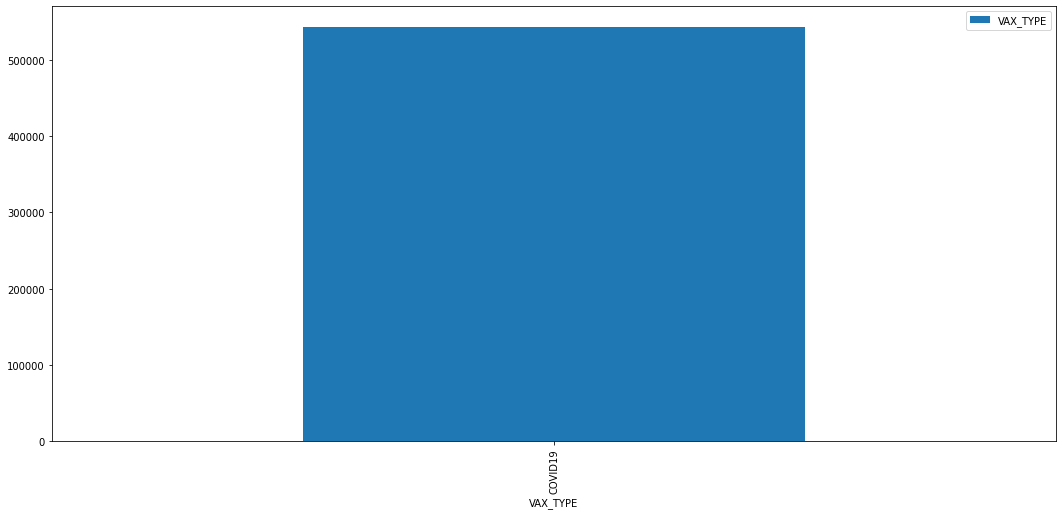

In [47]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
vax_df.groupby('VAX_TYPE').agg({'VAX_TYPE':'count'}).plot.bar(ax=ax)

### Observation: There's orders of magnitude more adverse event reports for covid vaccines than all other types of vaccines.

If we stop here it would appear that covid vaccines are more likely to cause side effects than all other types of vaccines. But in reality all it proves is that people taking the covid vaccines are more likely to report any side effect. 

As it says on the VAERS website:

> VAERS is a passive reporting system, meaning it relies on individuals to send in reports of their experiences. Anyone can submit a report to VAERS...

Let's zoom in on the covid vaccines

In [25]:
vax_df = vax_df[vax_df.VAX_TYPE=='COVID19']

In [30]:
vax_df.shape

(458222, 7)

In [33]:
symptoms_df.shape

(648024, 10)

In [38]:
vax_df = vax_df.join(symptoms_df, how='inner').drop_duplicates()

In [39]:
vax_df.shape

(543262, 17)

In [43]:
vax_df.sample(5)

,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
VAERS_ID,,,,,,,,,,,,,,,,,
1226893,COVID19,JANSSEN,NaN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Chills,23.1,Decreased appetite,23.1,Fatigue,23.1,Headache,23.1,Injection site pain,23.1
1175761,COVID19,MODERNA,o32m2oa,1,IM,RA,COVID19 (COVID19 (MODERNA)),Dizziness,24.0,Pyrexia,24.0,Vertigo,24.0,NaN,NaN,NaN,NaN
1247921,COVID19,JANSSEN,1805022,1,IM,RA,COVID19 (COVID19 (JANSSEN)),Thrombosis,24.0,Unresponsive to stimuli,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1102733,COVID19,PFIZER\BIONTECH,Em9810,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Muscle spasms,24.0,Pain in extremity,24.0,Peripheral swelling,24.0,Tachycardia,24.0,NaN,NaN
1164424,COVID19,MODERNA,031A21A,2,SYR,LA,COVID19 (COVID19 (MODERNA)),Pain,24.0,Pyrexia,24.0,NaN,NaN,NaN,NaN,NaN,NaN


Now we have 540k cases with symptoms.


In [44]:
data_df = vax_df.join(data_df, how='inner')

In [46]:
data_df['VAX_MANU'].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'UNKNOWN MANUFACTURER', 'JANSSEN'],
      dtype=object)

In [ ]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
data_df.groupby('VAX_MANU').count()

In [50]:
data_df.groupby('VAX_MANU')['VAX_MANU'].count().plot.bar()

VAX_MANU
JANSSEN                  57068
MODERNA                 238208
PFIZER\BIONTECH         246583
UNKNOWN MANUFACTURER      1403
Name: VAX_MANU, dtype: int64